# Simulation

## 1. Opque Lens Contamination Simulation

Using device: cuda


/home/tim/Documents/04_Projekt_ConSim/simulation_cameracontamination/contamination_simulation.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict

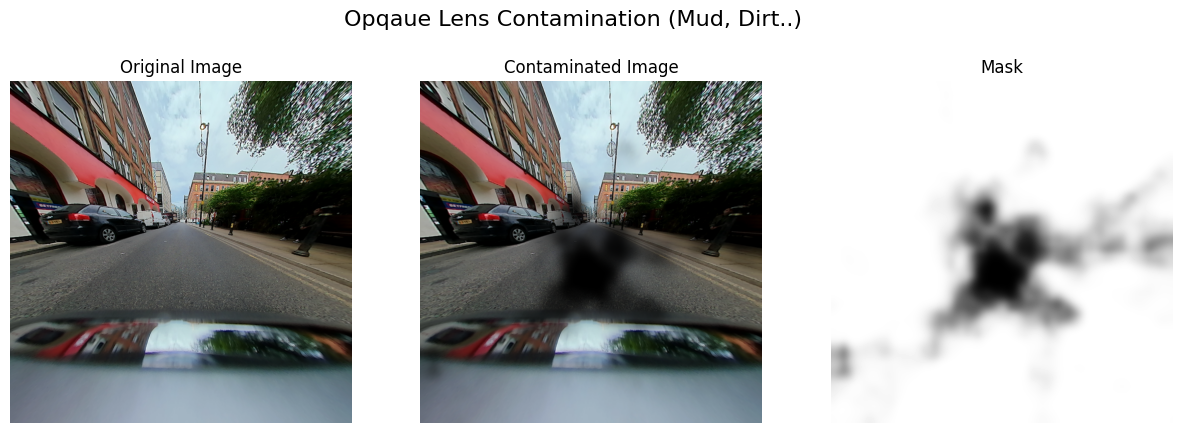

In [1]:
from contamination_simulation import OpaqueContaminationGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Example usage:
# Initialize the OpaqueContaminationGenerator with the path to the saved model
model_path = 'gen_models/best_model_total.pth'
opaque_contamination_generator = OpaqueContaminationGenerator(model_path)




# Load the image using OpenCV
image_path = 'examples/raw_total/00734_FV.png'
img_array = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)




# Generate and plot the contaminated image with specific x, y, size values
x = 0.5  # Normalized x
y = 0.5  # Normalized y
size = 0.3  # Normalized size

# Brown= (139, 90, 43)
contaminated_image, mask = opaque_contamination_generator.apply_mask_to_image(img_array, x, y, size, 
                                                                        mask_color=(0, 0, 0), blur_kernel_size=(51, 51), blur_sigma=0)


# Plot the original and contaminated images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contaminated_image, cmap='gray')
plt.title('Contaminated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(255-mask, cmap='gray')
plt.title('Mask')
plt.axis('off')


plt.suptitle('Opqaue Lens Contamination (Mud, Dirt..)', fontsize=16)
plt.show()

with Color Interpolation

Using device: cuda


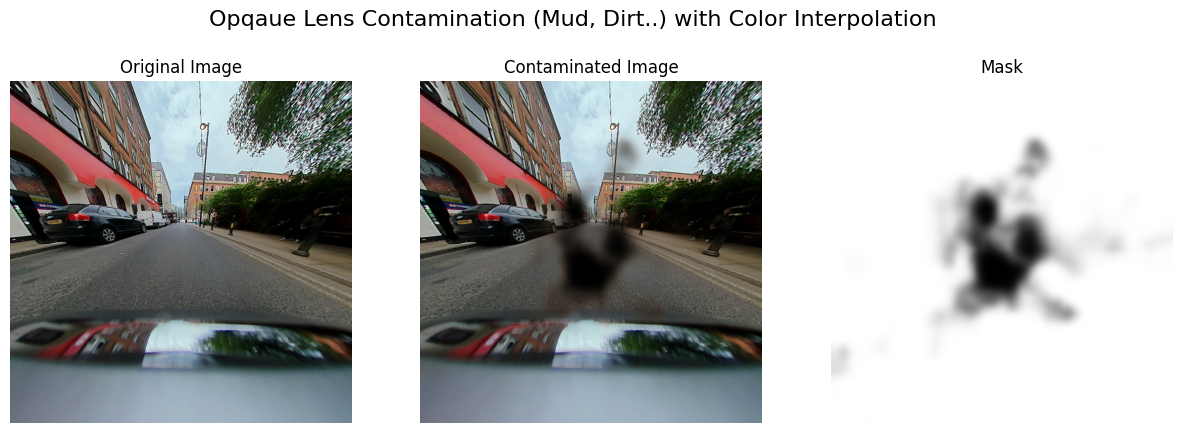

In [2]:
from contamination_simulation import OpaqueContaminationGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Example usage:
# Initialize the OpaqueContaminationGenerator with the path to the saved model
model_path = 'gen_models/best_model_total.pth'
opaque_contamination_generator = OpaqueContaminationGenerator(model_path)

# Load image
# Load the image using OpenCV
image_path = 'examples/raw_total/00734_FV.png'
img_array = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)




# Generate and plot the contaminated image with specific x, y, size values
x = 0.5  # Normalized x
y = 0.5  # Normalized y
size = 0.2  # Normalized size

# brown= (139, 90, 43), (121,85,60), (138,102,66), (180, 125, 73), (70, 60, 30)
# g = 0.5 bis 1
contaminated_image, mask = opaque_contamination_generator.apply_mask_to_image_twoc(img_array, x, y, size, 
                                                                        color_start=(139, 90, 43), color_end=(0,0,0), blur_kernel_size=(51, 51), blur_sigma=0, gamma = 0.5)

# Plot the original and contaminated images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contaminated_image, cmap='gray')
plt.title('Contaminated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(255-mask, cmap='gray')
plt.title('Mask')
plt.axis('off')


plt.suptitle('Opqaue Lens Contamination (Mud, Dirt..) with Color Interpolation', fontsize=16)
plt.show()

## 2. Semi Opque

Using device: cuda


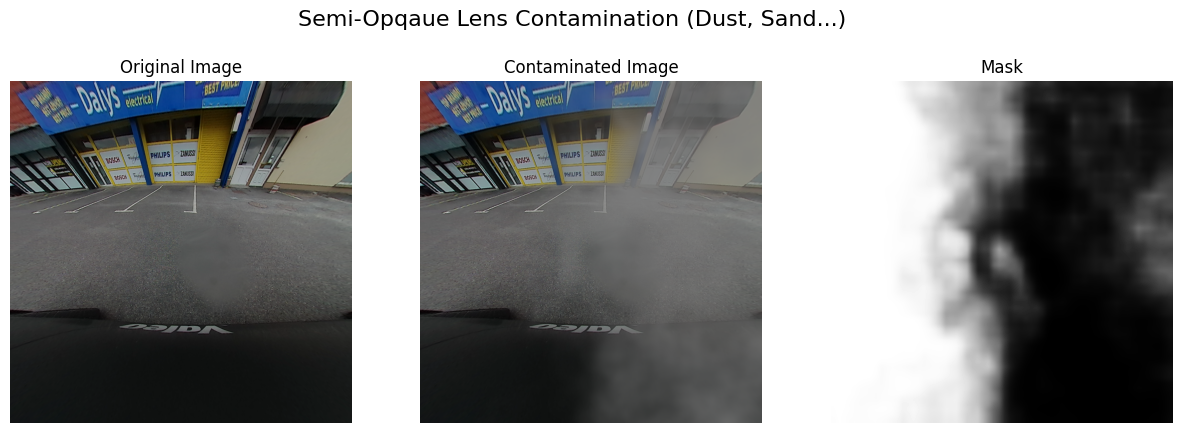

In [3]:
from contamination_simulation import SemiContaminationGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Example usage:
# Initialize the SemiContaminationGenerator with the path to the saved model
model_path = 'gen_models/best_model_semi.pth'
semi_contamination_generator = SemiContaminationGenerator(model_path)

# Load image
# Load the image using OpenCV
image_path = '/home/tim/Documents/04_Projekt_ConSim/simulation_cameracontamination/examples/orginal_3774_MVR.png'
img_array = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

# Generate and plot the contaminated image with specific x, y, size values
x = 0.8  # Normalized x
y = 0.6  # Normalized y
size = 0.8  # Normalized size

# Apply the mask with Perlin noise and plot the result
contaminated_image, mask = semi_contamination_generator.apply_mask_with_perlin_noise(img_array, x, y, size, mask_color = (125, 125, 125), noise_scale=1000)

# Plot the original and contaminated images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contaminated_image, cmap='gray')
plt.title('Contaminated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(255-mask, cmap='gray')
plt.title('Mask')
plt.axis('off')


plt.suptitle('Semi-Opqaue Lens Contamination (Dust, Sand...)', fontsize=16)
plt.show()

### 3. Droplet

Using device: cuda
(966, 966, 3)


/home/tim/Documents/04_Projekt_ConSim/simulation_cameracontamination/contamination_simulation.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dic

Problem with resize.. Using only distroted:roi
Case: ZoomIn
<class 'numpy.ndarray'>


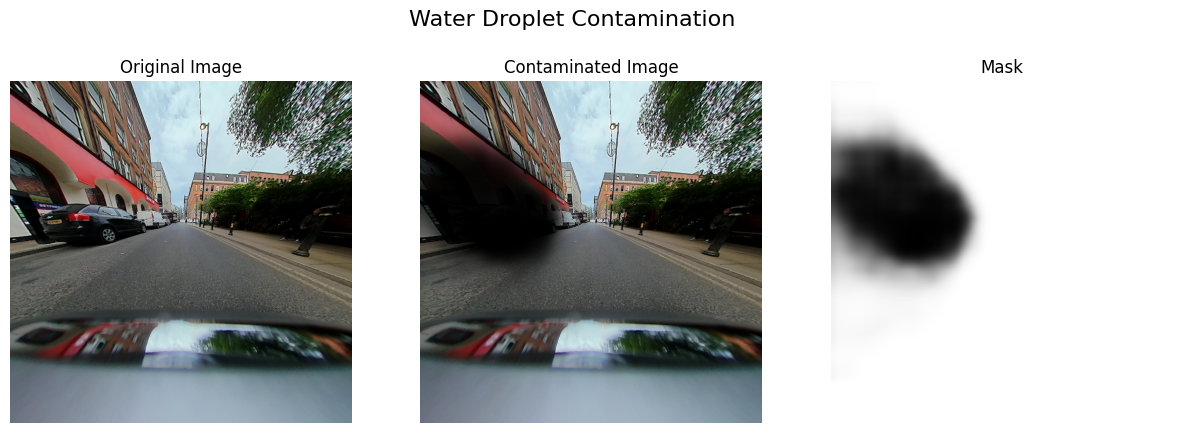

In [4]:
from contamination_simulation import DropletGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Example usage:
# Initialize the SemiContaminationGenerator with the path to the saved model
model_path = 'gen_models/best_model_droplet.pth'
droplet_contamination_generator = DropletGenerator(966, 966, 3, model_path)

# Load image
# Load the image using OpenCV
image_path = 'examples/raw_total/00734_FV.png'
img_array = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

print(img_array.shape)


# Generate and plot the contaminated image with specific x, y, size values
x = 0.3  # Normalized x
y = 0.4 # Normalized y
size = 0.5  # Normalized size

# Apply the mask with Perlin noise and plot the result
contaminated_image, mask = droplet_contamination_generator.simulate_droplet(f_C=380, raw_img=img_array, x=x, y=y, size=size,
                            mask_blurr_gauss_kernel=41, blur_sigma=0,
                            b_strength=0.001,
                            ib_gauss_kernel =201,
                            blurr_roi_gauss_kernel=41,
                            mood='black', mask_threshold=0.5, test=False)





# Plot the original and contaminated images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contaminated_image, cmap='gray')
plt.title('Contaminated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(255-mask, cmap='gray')
plt.title('Mask')
plt.axis('off')


plt.suptitle('Water Droplet Contamination', fontsize=16)
plt.show()